In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:
# Set paths
train_dir = 'dataset/Train'
test_dir = 'dataset/Test'
img_size = 32
batch_size = 64
num_classes = 46

In [4]:
# Data generators
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)


Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [5]:
# Model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

c:\Users\Lenovo\Documents\Hindi Handwriting Recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 46)             │        11,822 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,822 (921.18 KB)

 Trainable params: 235,822 (921.18 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Callbacks
checkpoint = ModelCheckpoint('models/best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


In [8]:
# Training
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=30,
    callbacks=[checkpoint, earlystop]
)


c:\Users\Lenovo\Documents\Hindi Handwriting Recognition\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.4197 - loss: 2.1295

c:\Users\Lenovo\Documents\Hindi Handwriting Recognition\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.93630, saving model to models/best_model.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 818s 668ms/step - accuracy: 0.4199 - loss: 2.1289 - val_accuracy: 0.9363 - val_loss: 0.2173
Epoch 2/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.8308 - loss: 0.5502
Epoch 2: val_accuracy improved from 0.93630 to 0.95623, saving model to models/best_model.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 872s 714ms/step - accuracy: 0.8308 - loss: 0.5502 - val_accuracy: 0.9562 - val_loss: 0.1357
Epoch 3/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 0.8827 - loss: 0.3764
Epoch 3: val_accuracy improved from 0.95623 to 0.96623, saving model to models/best_model.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 940s 770ms/step - accuracy: 0.8827 - loss: 0.3764 - val_accuracy: 0.9662 - val_loss: 0.1094
Epoch 4/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.9058 - loss: 0.3021
Epoch 4: val_accuracy improved from 0.96623 to 0.97000, saving model to models/best_model.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 830s 680ms/step - accuracy: 0.9058 - loss: 0.3021 - val_accuracy: 0.9700 - val_loss: 0.0915
Epoch 5/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 729ms/step - accuracy: 0.9210 - loss: 0.2552
Epoch 5: val_accuracy improved from 0.97000 to 0.97739, saving model to models/best_model.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1097s 898ms/step - accuracy: 0.9210 - loss: 0.2552 - val_accuracy: 0.9774 - val_loss: 0.0755
Epoch 6/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.9315 - loss: 0.2247
Epoch 6: val_accuracy improved from 0.97739 to 0.98000, saving model to models/best_model.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 722s 591ms/step - accuracy: 0.9315 - loss: 0.2247 - val_accuracy: 0.9800 - val_loss: 0.0649
Epoch 7/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9379 - loss: 0.1992
Epoch 7: val_accuracy did not improve from 0.98000
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1903s 2s/step - accuracy: 0.9379 - loss: 0.1992 - val_accuracy: 0.9790 - val_loss: 0.0655
Epoch 8/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.9438 - loss: 0.1774
Epoch 8: val_accuracy improved from 0.98000 to 0.98362, saving model to models/best_model.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 836s 685ms/step - accuracy: 0.9438 - loss: 0.1774 - val_accuracy: 0.9836 - val_loss: 0.0526
Epoch 9/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - accuracy: 0.9491 - loss: 0.1656
Epoch 9: val_accuracy did not improve from 0.98362
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1203s 985ms/step - accuracy: 0.9491 - loss: 0.1656 - val_accuracy: 0.9832 - val_loss: 0.0541
Epoch 10/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.9512 - loss: 0.1610
Epoch 10: val_accuracy improved from 0.98362 to 0.98601, saving model to models/best_model.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 788s 644ms/step - accuracy: 0.9512 - loss: 0.1610 - val_accuracy: 0.9860 - val_loss: 0.0494
Epoch 11/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9526 - loss: 0.1523
Epoch 11: val_accuracy did not improve from 0.98601
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2187s 2s/step - accuracy: 0.9526 - loss: 0.1523 - val_accuracy: 0.9843 - val_loss: 0.0502
Epoch 12/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9575 - loss: 0.1375
Epoch 12: val_accuracy did not improve from 0.98601
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2246s 2s/step - accuracy: 0.9575 - loss: 0.1375 - val_accuracy: 0.9835 - val_loss: 0.0531
Epoch 13/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 951ms/step - accuracy: 0.9582 - loss: 0.1343
Epoch 13: val_accuracy did not improve from 0.98601
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1382s 1s/step - accuracy: 0.9582 - loss: 0.1343 - val_accuracy: 0.9827 - val_loss: 0.0582
Epoch 14/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9591 - loss: 0.1320
Epo

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1539s 1s/step - accuracy: 0.9591 - loss: 0.1320 - val_accuracy: 0.9875 - val_loss: 0.0433
Epoch 15/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.9611 - loss: 0.1233
Epoch 15: val_accuracy did not improve from 0.98746
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 939s 768ms/step - accuracy: 0.9611 - loss: 0.1233 - val_accuracy: 0.9873 - val_loss: 0.0415
Epoch 16/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 891ms/step - accuracy: 0.9637 - loss: 0.1193
Epoch 16: val_accuracy did not improve from 0.98746
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1313s 1s/step - accuracy: 0.9637 - loss: 0.1193 - val_accuracy: 0.9861 - val_loss: 0.0486
Epoch 17/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9654 - loss: 0.1125
Epoch 17: val_accuracy improved from 0.98746 to 0.98790, saving model to models/best_model.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1567s 1s/step - accuracy: 0.9654 - loss: 0.1125 - val_accuracy: 0.9879 - val_loss: 0.0422
Epoch 18/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9658 - loss: 0.1095
Epoch 18: val_accuracy did not improve from 0.98790
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1636s 1s/step - accuracy: 0.9658 - loss: 0.1095 - val_accuracy: 0.9867 - val_loss: 0.0471
Epoch 19/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9657 - loss: 0.1119
Epoch 19: val_accuracy did not improve from 0.98790
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1570s 1s/step - accuracy: 0.9657 - loss: 0.1119 - val_accuracy: 0.9878 - val_loss: 0.0430
Epoch 20/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9675 - loss: 0.1064
Epoch 20: val_accuracy improved from 0.98790 to 0.98797, saving model to models/best_model.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3485s 3s/step - accuracy: 0.9675 - loss: 0.1064 - val_accuracy: 0.9880 - val_loss: 0.0434
Epoch 21/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9696 - loss: 0.1027
Epoch 21: val_accuracy improved from 0.98797 to 0.98870, saving model to models/best_model.h5


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3487s 3s/step - accuracy: 0.9696 - loss: 0.1027 - val_accuracy: 0.9887 - val_loss: 0.0411
Epoch 22/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 906ms/step - accuracy: 0.9693 - loss: 0.0978
Epoch 22: val_accuracy did not improve from 0.98870
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1339s 1s/step - accuracy: 0.9693 - loss: 0.0978 - val_accuracy: 0.9867 - val_loss: 0.0430
Epoch 23/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 987ms/step - accuracy: 0.9712 - loss: 0.0954
Epoch 23: val_accuracy did not improve from 0.98870
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1366s 1s/step - accuracy: 0.9712 - loss: 0.0954 - val_accuracy: 0.9880 - val_loss: 0.0424
Epoch 24/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.9717 - loss: 0.0935
Epoch 24: val_accuracy did not improve from 0.98870
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1166s 955ms/step - accuracy: 0.9717 - loss: 0.0935 - val_accuracy: 0.9870 - val_loss: 0.0432
Epoch 25/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 831ms/step - accuracy: 0.9709 - loss: 

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1208s 989ms/step - accuracy: 0.9709 - loss: 0.0973 - val_accuracy: 0.9896 - val_loss: 0.0405
Epoch 26/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9709 - loss: 0.0942
Epoch 26: val_accuracy did not improve from 0.98957
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2032s 2s/step - accuracy: 0.9709 - loss: 0.0942 - val_accuracy: 0.9875 - val_loss: 0.0436
Epoch 27/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - accuracy: 0.9726 - loss: 0.0922
Epoch 27: val_accuracy did not improve from 0.98957
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1244s 1s/step - accuracy: 0.9726 - loss: 0.0922 - val_accuracy: 0.9877 - val_loss: 0.0427
Epoch 28/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 719ms/step - accuracy: 0.9726 - loss: 0.0882
Epoch 28: val_accuracy did not improve from 0.98957
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1051s 861ms/step - accuracy: 0.9726 - loss: 0.0882 - val_accuracy: 0.9889 - val_loss: 0.0434
Epoch 29/30
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9742 - loss: 0.0

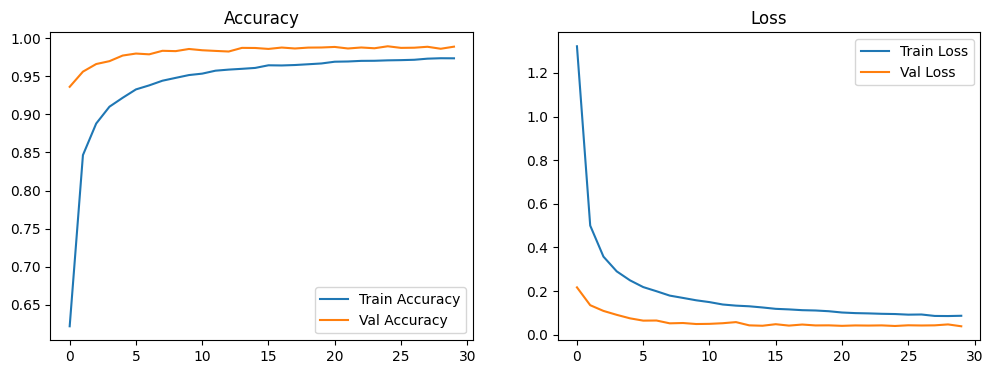

In [9]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.savefig("training_curves.png")
plt.show()